In [40]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

listings_data = pd.read_csv('./calendar.csv')
listings_data.head(2)

,listing_id,date,available,price
0,1810172,2015-10-03,f,NaN
1,1810172,2015-10-04,f,NaN


In [54]:
cleanedListCalendar = listings_data[listings_data["available"]=="t"]

In [73]:
cleanedListCalendar.groupby("listing_id").describe()

available        date    price
listing_id                                      
3353       count        321         321      321
           unique         1         321        1
           top            t  2015-12-14   $50.00
           freq         321           1      321
3781       count        350         350      350
           unique         1         350        1
           top            t  2016-02-06  $150.00
           freq         350           1      350
5453       count         56          56       56
           unique         1          56        1
           top            t  2016-10-01  $150.00
           freq          56           1       56
5506       count        353         353      353
           unique         1         353        2
           top            t  2016-02-06  $145.00
           freq         353           1      347
6695       count        343         343      343
           unique         1         343        2
           top            t  2016-02-06  $195.00
           freq         343           1      337
6976       count        289         289      289
           unique         1         289        1
           top            t  2016-02-06   $65.00
           freq         289           1      289
8789       count        306         306      306
           unique         1         306        1
           top            t  2015-12-14  $155.00
           freq         306           1      306
8792       count        275         275      275
           unique         1         275        1
...                     ...         ...      ...
8670336    top            t  2016-02-06  $225.00
           freq         361           1      234
8673298    count        363         363      363
           unique         1         363        1
           top            t  2016-02-06   $80.00
           freq         363           1      363
8680170    count         13          13       13
           unique         1          13        2
           top            t  2015-12-19  $250.00
           freq          13           1       11
8680966    count        363         363      363
           unique         1         363        1
           top            t  2016-02-06   $60.00
           freq         363           1      363
8686165    count        275         275      275
           unique         1         275        1
           top            t  2016-02-06  $324.00
           freq         275           1      275
8687859    count        359         359      359
           unique         1         359        1
           top            t  2016-02-06   $75.00
           freq         359           1      359
8688496    count        349         349      349
           unique         1         349        1
           top            t  2016-02-06  $275.00
           freq         349           1      349
8689904    count        365         365      365
           unique         1         365        1
           top            t  2016-02-06   $99.00
           freq         365           1      365

[9888 rows x 3 columns]

In [29]:
# Let's see the number of features in this first listings csv
import indicoio
indicoio.config.api_key = "4f3fad752e203376851290629b530420"
# listings_data["neighborhood_overview"]
# print listings_data["neighborhood_overview"
# listings_data["neighborhood_overview"]=listings_data["neighborhood_overview"].fillna("It's okay")

# listings_data = listings_data[1:100]

# listings_data
# ktype(clearedListings.head(9))

# sentiments= []
# for i in range(len(listings_data["neighborhood_overview"])+1):
#     listings_data["neighborhood_overview"]
#     sentiments.append(indicoio.sentiment(listings_data["neighborhood_overview"][i]))/

<class 'pandas.core.series.Series'>


In [105]:
# API for preprocessing
class dataExtractor():
    def __init__(self, data):
        self.data = data
    def getLat(self):
        self.lat = self.data['latitude']
        return self.lat
    def getLon(self):
        self.lon = self.data['longitude']
        return self.lon
    def getAvailability(self):
        self.availability = self.data["availability_365"]
        return self.availability
    def availability_info(self, id):
        groupbself.data[id]

extractor = dataExtractor(listings_data)

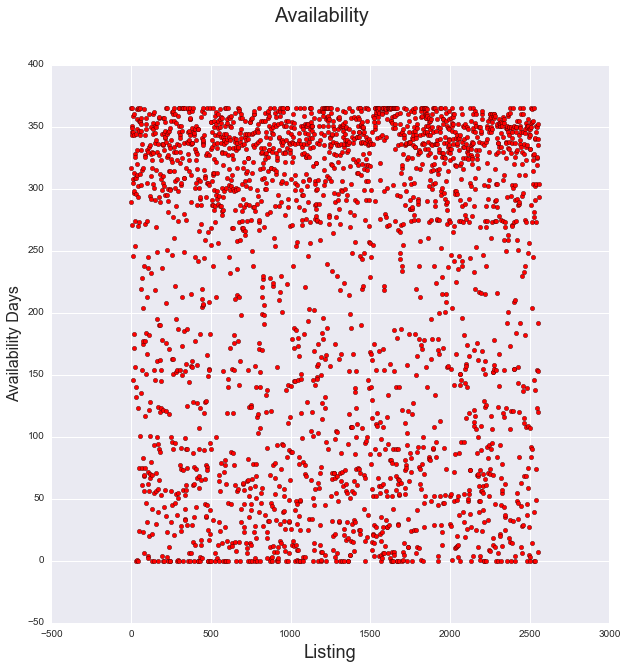

In [116]:
lst = []
for i in range(listings_data.count()[0]):
    lst.append(i)

fig = plt.figure()
fig.set_size_inches(10,10)  
plt.scatter(lst,extractor.getAvailability(), c='red', label='Width-Measured Knoop Values')
fig.suptitle('Availability', fontsize=20)

plt.xlabel('Listing', fontsize=18)
plt.ylabel('Availability Days', fontsize=16)
plt.show()

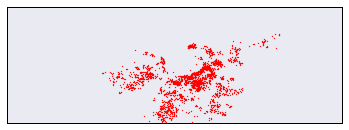

In [120]:
# Import the basemap package
from mpl_toolkits.basemap import Basemap
import numpy as np

# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(llcrnrlat=42.300097,urcrnrlat=42.426517,llcrnrlon=-71.2828345,urcrnrlon=-70.918869,lat_ts=20,resolution='c')


# m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(extractor.getLon().astype(float)), list(extractor.getLat().astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')

# Show the plot.
plt.show()

## Thoughts for Exploration and CTW Aspect

### Questions we would like to tackle
 - What is the one amenity that makes your listing more desireable? (**Patrick**)
     - number of reviews vs. number of amenities
     - review score value accuracy, communication - for different amenities offered
     - reviewed value
 - Reviews per month --> host statistics potential analysis - communication score and Review per month (**Patrick**)
 - How much does a neighborhood affect the listing's qualities (**Filippos**)
     - bar graphs based on variation of price 
 - What affects price? (**BOTH --> think about future**)
     - Seasonality
     - Location (neighborhood, [lat,long])
     - Bio
     - Reviews (their sentiments/scores)
 - Reviews ~ Price ? 
 - Get heatmap of prices and see whether we can detect if there is an affluence (**BOTH**)
 - Heatmap of desireability of location/area --> Let's look into that later 
 - Time Series of bookings and how many bookings there are for different areas
 - Acceptance rate --> how does this affect their profile/ratings + host reliability  (**Filippos**)
 - How does price vary over time (calendar.csv)? Notice any patterns there for different listings? Might have to correlate with the other listings CSV file and derive certain conclusions.
     - normalize variation in price to see how it is affected by time (calendar.csv)
 - What gives us a job at Airbnb? (**BOTH**)


### Vizualizations
 - Figure out library to use
     - Seaborn --> use for static/non-static **non-map** vizualizations
     - JS libraries for overlaying information on maps and other cool stuff - D3
 - Interactive vs. static
      - Plotly:
          - Not enought reference documentation
          - WebAPI with wrappers - Is it easy to manipulate
      - Seaborn:
          - Seems very static-based
      - Basemap
          - Nothing super interesting about it
 
### Area/Neighbohood information --> Meta data for the location and context
 - Perhaps use information from other datasets to *assess* the area
 
### For next time
 - Explore the dataset and produce insights and vizualizations on the questions we found interesting to tackle
 
### During Tuesday
 - Develop an API for methods to use 
 - Util for reviews --> poll a given if to get all reviews
 
### Due Friday
 - Model Iteration #1 and formally present findings on 
 
 